In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2236,flat,piedmont taksila heights,sector 37c,0.90,5855.0,1537.0,Built Up area: 1537 (142.79 sq.m.),3,3,3,not available,9.0,South-West,5 to 10 Year Old,"['Kamla Hospital Gurgaon', 'Shri Multispeciali...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
2279,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,not available,0.0,NaN,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'South point Ma...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
2895,flat,pareena mi casa,sector 68,1.85,9310.0,1987.0,Super Built up area 1987(184.6 sq.m.),3,3,3+,not available,13.0,NaN,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', '...",[],NaN


In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',..."
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,2.0,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te..."
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN


In [ ]:
#focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

In [6]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2237,flat,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,0,not available,27.0,NaN,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospit...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN
3777,house,independent,sector 46,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),5,4,3+,servant room,3.0,North-West,5 to 10 Year Old,"['Axis bank ATM', 'State bank of india ATM', '...","['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '40 L...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
872,flat,ats kocoon,sector 109,1.65,10645.0,1550.0,Super Built up area 1745(162.12 sq.m.)Built Up...,3,3,3,store room,19.0,East,1 to 5 Year Old,"['Jagdish Super Market', 'Dwarka', 'Euro Inter...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '15 L...","['Water purifier', 'Centrally Air Conditioned'..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3785 non-null   object 
 1   society          3784 non-null   object 
 2   sector           3785 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3785 non-null   object 
 7   bedRoom          3785 non-null   int64  
 8   bathroom         3785 non-null   int64  
 9   balcony          3785 non-null   object 
 10  additionalRoom   3785 non-null   object 
 11  floorNum         3766 non-null   float64
 12  facing           2686 non-null   object 
 13  agePossession    3784 non-null   object 
 14  nearbyLocations  3609 non-null   object 
 15  furnishDetails   2809 non-null   object 
 16  features         3154 non-null   object 
dtypes: float64(4),

In [8]:
df.shape

(3785, 17)

In [10]:
df.duplicated().sum()

121

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
2519,flat,ambience caitriona,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),4,5,3,not available,3.0,East,undefined,"['Dlf phase 3 metro station', 'Micromax moulsa...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
1540,flat,ss the leaf,sector 85,1.20,9677.0,1240.0,Super Built up area 1772(164.62 sq.m.)Carpet a...,2,2,3+,store room,9.0,East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['10 Light', '4 AC', 'No Bed', 'No Chimney', '...","['Centrally Air Conditioned', 'Water purifier'..."
1172,flat,bptp astaire gardens,sector 70a,1.25,8771.0,1425.0,Super Built up area 1425(132.39 sq.m.)Built Up...,3,3,2,others,1.0,South-East,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Airia Mall'...","['1 Fan', '1 Geyser', '1 Light', '4 AC', 'No B...","['Feng Shui / Vaastu Compliant', 'Security / F..."


# 1) Area with Type

In [14]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3267,0.32,450.0,Built Up area: 450 (41.81 sq.m.)Carpet area: 3...
2400,0.48,900.0,Carpet area: 100 (83.61 sq.m.)
1936,1.45,1600.0,Super Built up area 1495(138.89 sq.m.)Built Up...
2729,2.00,2630.0,Super Built up area 2630(244.33 sq.m.)
1529,0.38,595.0,Carpet area: 594.91 (55.27 sq.m.)


In [15]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [16]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [17]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [18]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [19]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
429,1.64,flat,1950.0,Super Built up area 1950(181.16 sq.m.),1950.0,NaN,NaN
465,3.40,flat,2358.0,Super Built up area 2358(219.07 sq.m.)Carpet a...,2358.0,NaN,1708.0
2977,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
2680,0.80,flat,1361.0,Built Up area: 1361 (126.44 sq.m.)Carpet area:...,NaN,1361.0,1300.0
3621,2.50,house,1850.0,Plot area 1530(142.14 sq.m.)Built Up area: 190...,NaN,1900.0,1850.0


In [20]:
df.duplicated().sum()

0

In [27]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(531, 7)

In [24]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2942,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2943,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,NaN,NaN
2944,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
2945,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
2946,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN


In [28]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [29]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2942,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2943,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,NaN,NaN
2944,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
2945,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
2946,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN


In [30]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [31]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [32]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [33]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2942,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
2943,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,61.00,NaN
2944,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,129.00,NaN
2945,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
2946,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
2947,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
2948,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
2949,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
2950,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
2951,4.45,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [34]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [35]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [36]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2942,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.0,NaN
2943,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,549.0,NaN
2944,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,1161.0,NaN
2945,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.0,NaN
2946,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,1152.0,NaN


In [37]:
df.update(all_nan_df)

In [38]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1042
agePossession             1
nearbyLocations         169
furnishDetails          941
features                595
super_built_up_area    1788
built_up_area          1988
carpet_area            1793
dtype: int64

# 2) Additional Room

In [40]:
df.sample(4)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
1320,flat,sare homes,sector 92,1.12,5358.0,2090.0,Carpet area: 2090 (194.17 sq.m.),4,4,2,servant room,12.0,North-West,1 to 5 Year Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,2090.0
1841,flat,the close north,sector 50,2.75,12500.0,2200.0,Super Built up area 2605(242.01 sq.m.)Built Up...,3,3,3,servant room,3.0,South-East,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Eros City Squa...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2605.0,2400.0,2200.0
3306,house,unitech uniworld resorts,sector 33,8.00,17778.0,4500.0,Built Up area: 500 (418.06 sq.m.),6,5,3+,not available,4.0,NaN,undefined,NaN,NaN,NaN,NaN,500.0,NaN
462,flat,emaar mgf emerald estate,sector 65,1.75,12544.0,1395.0,Super Built up area 1395(129.6 sq.m.)Carpet ar...,3,3,3,servant room,10.0,North-East,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Central Plaza ...","['1 Exhaust Fan', '3 Geyser', '7 Light', '1 Ch...","['Security / Fire Alarm', 'Intercom Facility',...",1395.0,NaN,809.0


In [41]:
df['additionalRoom'].value_counts()

not available                                    1509
servant room                                      687
study room                                        242
others                                            219
pooja room                                        164
store room                                         97
study room,servant room                            96
pooja room,servant room                            82
pooja room,study room,servant room,store room      71
servant room,others                                55
pooja room,study room,servant room                 52
pooja room,study room,servant room,others          51
servant room,pooja room                            38
servant room,store room                            30
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
servant room,study room     

In [42]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [43]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
357,not available,0,0,0,0,0
1738,not available,0,0,0,0,0
3478,"pooja room,study room,servant room,others",1,1,0,1,1
2974,store room,0,0,1,0,0
765,store room,0,0,1,0,0


# 3) Age Possesion

In [44]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
1384,flat,sbtl caladium,sector 109,1.90,6219.0,3055.0,Super Built up area 3055(283.82 sq.m.),4,4,3,servant room,8.0,North-East,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Chirag Hospital...",NaN,"['Water purifier', 'Security / Fire Alarm', 'F...",3055.0,NaN,NaN,0,1,0,0,0
226,flat,sare homes,sector 92,0.60,5000.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3,not available,4.0,NaN,5 to 10 Year Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,1200.0,0,0,0,0,0
354,flat,the khushboo cooperative housing society ltd,sector 9a,0.88,4888.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet a...,3,3,2,not available,2.0,North-West,10+ Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Lift(s)', 'Water St...",1800.0,NaN,1123.0,0,0,0,0,0


In [45]:
df['agePossession'].value_counts()

1 to 5 Year Old       1640
5 to 10 Year Old       558
0 to 1 Year Old        500
undefined              306
10+ Year Old           302
Under Construction      87
Within 6 months         67
Within 3 months         24
Dec-23                  20
By 2023                 17
By 2024                 16
Dec-24                  15
Mar-24                  12
Jan-24                   7
Dec-25                   7
Jun-24                   7
Oct-24                   6
Aug-23                   6
Nov-23                   5
Sep-23                   4
Aug-24                   4
By 2025                  4
Oct-23                   4
Jan-25                   3
Feb-24                   3
Jul-24                   3
May-24                   3
Nov-24                   3
Jul-27                   2
Dec-26                   2
By 2027                  2
Mar-25                   2
Jan-26                   2
Jul-25                   2
Aug-25                   2
Apr-26                   2
Jun-27                   2
S

In [46]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [47]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [48]:
df['agePossession'].value_counts()

Relatively New        1640
New Property           591
Moderately Old         558
Undefined              447
Old Property           302
Under Construction     126
Name: agePossession, dtype: int64

In [49]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
2037,flat,hcbs sports ville,sohna road,0.20,4219.0,474.0,Built Up area: 473.99 (44.04 sq.m.),1,1,1,not available,3.0,East,New Property,"['The roadside cafe', 'GD Goenka Mess', 'ROyal...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,474.042156,NaN,0,0,0,0,0
82,flat,brisk lumbini terrace homes,sector 109,1.38,6338.0,2177.0,Carpet area: 2177 (202.25 sq.m.),3,3,1,not available,4.0,NaN,Moderately Old,"['Palam Vihar Vyapar kendra', 'Ram Mandir', 'K...",[],"['Maintenance Staff', 'Water Storage', 'Visito...",NaN,NaN,2177.0,0,0,0,0,0
3138,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,pooja room,1.0,South-East,Old Property,"['Hanuman Mandir', 'Kharbanda Maternity and Nu...",NaN,['Park'],NaN,1800.000000,NaN,0,0,0,1,0


# 4) Furnishing 

In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,900.0,0,0,0,0,0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...",NaN,NaN,650.0,0,0,0,0,0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,NaN,New Property,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,NaN,595.0,0,0,0,0,0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,2.0,NaN,Undefined,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,NaN,1200.0,1,0,0,0,0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN,1345.0,NaN,NaN,1,0,0,0,0


In [51]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
495,"['1 Exhaust Fan', '4 AC', '1 Modular Kitchen',...","['Feng Shui / Vaastu Compliant', 'Security / F..."
2109,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Security / Fire Alarm', 'Private Garden / Te..."
773,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
2035,NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M..."
721,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Centrally Air Conditioned', 'Water purifier'..."


In [52]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [53]:
furnishings_df.shape

(3664, 19)

In [54]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
furnishings_df.sample(5)

,Water Purifier,Stove,Modular Kitchen,AC,Curtains,Chimney,Exhaust Fan,Microwave,Light,Fan,Sofa,Washing Machine,TV,Dining Table,Wardrobe,Geyser,Bed,Fridge
347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3276,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0
2340,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2469,1,1,1,4,1,1,1,1,6,5,1,1,1,1,3,4,3,1


In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [58]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

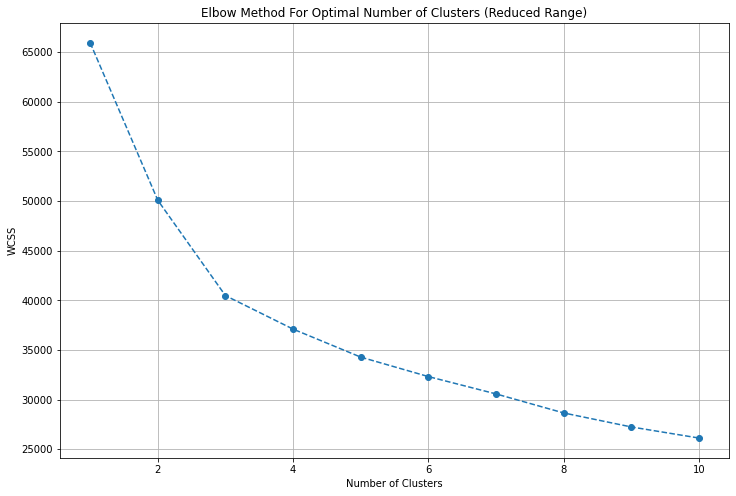

In [59]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [60]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [61]:
df = df.iloc[:,:-18]

In [62]:
df['furnishing_type'] = cluster_assignments

In [63]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2647,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",1
1653,"['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...",0
3093,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",1
177,"['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No ...",1
619,NaN,1


# 5) Features

In [64]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
2681,flat,sidhartha ncr one phase,sector 95,0.46,4646.0,990.0,Built Up area: 990 (91.97 sq.m.),2,2,0,not available,6.0,NaN,Undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,990.0,NaN,0,0,0,0,0,1
3600,house,unitech nirvana birch court,sector 50,11.95,36883.0,3240.0,Plot area 360(301.01 sq.m.),3,3,2,"study room,servant room",1.0,West,Moderately Old,"['Radhakrishna Shani Mandir', 'Standard charte...","['1 Wardrobe', '1 Fan', '1 Geyser', '3 Light',...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,3240.0,NaN,1,1,0,0,0,1
2428,flat,umang winter hills,sector 77,1.00,7500.0,1333.0,Carpet area: 1340 (124.49 sq.m.),2,2,2,not available,3.0,NaN,New Property,"['Entertainland Mall', 'Delhi Jaipur Expresswa...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,1340.0,0,0,0,0,0,1


In [65]:
df[['society','features']].sample(5)

,society,features
275,sukhshanti apartment,"['Feng Shui / Vaastu Compliant', 'Security / F..."
96,m3m skycity,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
258,ansal housing highland park,"['Intercom Facility', 'Lift(s)', 'Swimming Poo..."
2226,rof ananda,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3143,independent,NaN


In [66]:
df['features'].isnull().sum()

595

In [67]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [68]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [69]:
temp_df = df[df['features'].isnull()]

In [70]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [71]:
df.loc[temp_df.index,'features'] = x.values

In [72]:
df['features'].isnull().sum()

454

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [74]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [75]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
981,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
430,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
421,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [76]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

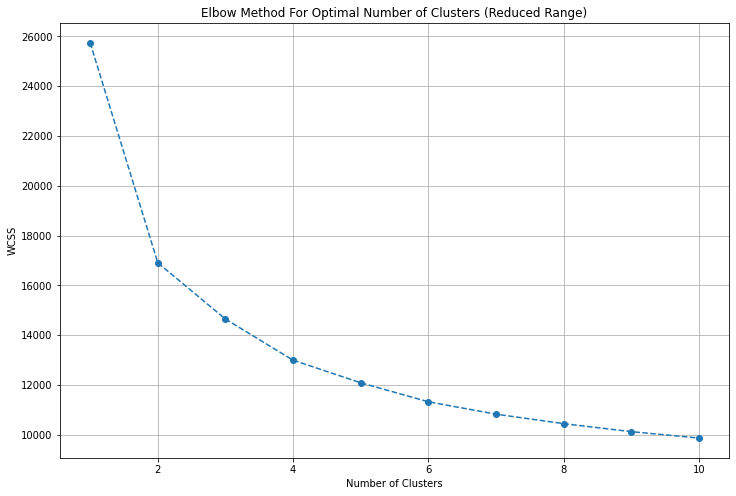

In [77]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [78]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [79]:
df['luxury_score'] = luxury_score

In [80]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [81]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3463,house,dlf city plots,sector 26,19.00,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.00,NaN,1,1,0,0,0,0,147.0
3449,house,independent,sector 26,8.90,32963.0,2700.0,Plot area 300(250.84 sq.m.),4,4,3+,2.0,South-East,Old Property,NaN,2700.00,NaN,1,1,1,1,0,1,72.0
700,flat,sbtl caladium,sector 109,1.60,6286.0,2545.0,Super Built up area 2545(236.44 sq.m.),3,3,3,9.0,North,Relatively New,2545.0,NaN,NaN,0,1,0,0,0,1,174.0
665,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2,3,3,4.0,East,Relatively New,1283.0,978.23,734.43,1,0,0,0,0,1,49.0
2346,flat,irwo westend towers,sector 47,0.65,12059.0,539.0,Carpet area: 539 (50.07 sq.m.),1,1,2,3.0,NaN,Old Property,NaN,NaN,539.00,0,0,0,0,0,1,57.0


In [82]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)